In [26]:
import pandas as pd
import os
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root_dir = "/media/visionin/data_station/OctanData/BSC/running/20230105/"

# Load Addresses

In [3]:
address_dict_path = root_dir + "address_dict.pickle"
with open(address_dict_path, 'rb') as handle:
    address_dict = pickle.load(handle)
print(len(address_dict.keys()))

54133553


In [4]:
# create node list table
node_list = pd.DataFrame(address_dict.items(), columns=['Address', 'ID'])

In [5]:
node_list.head(5)

,Address,ID
0,0x7f74b66bb8a5ab09934ab3a8ac9c7a3a43acd5be,0
1,0x54b9b2f32bcb7cdffe21c2f91710d843f0f1400e,1
2,0x4668eaa732fc5547f96f8ea584acb0a29d7ef95a,2
3,0xebf7abc4316004cda6f5e61e631ef47d406116a1,3
4,0x7a36bbc328c88b62ada9ba351e8ddbf6bb83488d,4


# Load Reputation Scores

In [6]:
# d =0.85
pagerank_dict_v1_path = root_dir + "weighted_pagerank_v1.pickle"
with open(pagerank_dict_v1_path, 'rb') as handle:
    pagerank_dict_v1 = pickle.load(handle)
print(len(pagerank_dict_v1.keys()))

54128070


In [7]:
start_time = time.time()
node_list['Reputation_1'] = node_list.apply(lambda row: pagerank_dict_v1[row["ID"]]*1000 if (row["ID"] in pagerank_dict_v1.keys()) else 0, axis=1)
print(time.time()-start_time)

528.4953374862671


In [8]:
# d = 0.5
pagerank_dict_v2_path = root_dir + "weighted_pagerank_v2.pickle"
with open(pagerank_dict_v2_path, 'rb') as handle:
    pagerank_dict_v2 = pickle.load(handle)
print(len(pagerank_dict_v2.keys()))

54128070


In [9]:
start_time = time.time()
node_list['Reputation_2'] = node_list.apply(lambda row: pagerank_dict_v2[row["ID"]]*1000 if (row["ID"] in pagerank_dict_v2.keys()) else 0, axis=1)
print(time.time()-start_time)

536.0536139011383


In [10]:
# personalized = None
pagerank_dict_v3_path = root_dir + "weighted_pagerank_v3.pickle"
with open(pagerank_dict_v3_path, 'rb') as handle:
    pagerank_dict_v3 = pickle.load(handle)
print(len(pagerank_dict_v3.keys()))

54128070


In [11]:
start_time = time.time()
node_list['Reputation_3'] = node_list.apply(lambda row: pagerank_dict_v3[row["ID"]]*1000 if (row["ID"] in pagerank_dict_v3.keys()) else 0, axis=1)
print(time.time()-start_time)

529.0627679824829


In [12]:
# simple pagerank
pagerank_dict_v4_path = root_dir + "weighted_pagerank_v4.pickle"
with open(pagerank_dict_v4_path, 'rb') as handle:
    pagerank_dict_v4 = pickle.load(handle)
print(len(pagerank_dict_v4.keys()))

54128070


In [13]:
start_time = time.time()
node_list['Reputation_4'] = node_list.apply(lambda row: pagerank_dict_v4[row["ID"]]*1000 if (row["ID"] in pagerank_dict_v4.keys()) else 0, axis=1)
print(time.time()-start_time)

536.7835609912872


# Load degree

In [14]:
degree_dict_path = root_dir + "degree.pickle"
with open(degree_dict_path, 'rb') as handle:
    degree_dict = pickle.load(handle)
print(len(degree_dict.keys()))

54128070


In [15]:
start_time = time.time()
node_list['Degree'] = node_list.apply(lambda row: degree_dict[row["ID"]] if (row["ID"] in degree_dict.keys()) else 0, axis=1)
print(time.time()-start_time)

527.8947186470032


In [16]:
in_degree_dict_path = root_dir + "in_degree.pickle"
with open(in_degree_dict_path, 'rb') as handle:
    in_degree_dict = pickle.load(handle)
print(len(in_degree_dict.keys()))

54128070


In [17]:
start_time = time.time()
node_list['In Degree'] = node_list.apply(lambda row: in_degree_dict[row["ID"]] if (row["ID"] in in_degree_dict.keys()) else 0, axis=1)
print(time.time()-start_time)

529.9190096855164


In [18]:
node_list.head(5)

,Address,ID,Reputation_1,Reputation_2,Reputation_3,Reputation_4,Degree,In Degree
0,0x7f74b66bb8a5ab09934ab3a8ac9c7a3a43acd5be,0,0.000000,0.000000,0.000010,0.000010,24,0
1,0x54b9b2f32bcb7cdffe21c2f91710d843f0f1400e,1,0.003761,0.005383,0.001196,0.001158,1843,1843
2,0x4668eaa732fc5547f96f8ea584acb0a29d7ef95a,2,0.000000,0.000000,0.000010,0.000010,22,0
3,0xebf7abc4316004cda6f5e61e631ef47d406116a1,3,0.000000,0.000000,0.000010,0.000010,20,0
4,0x7a36bbc328c88b62ada9ba351e8ddbf6bb83488d,4,0.000000,0.000000,0.000010,0.000010,17,0


# kendall tau

In [20]:
node_list.sort_values('Reputation_1', inplace=True, ascending=False)
node_list.reset_index(drop=True, inplace=True)
node_list['wpr_ranking_1'] = node_list.index

In [21]:
node_list.sort_values('Reputation_2', inplace=True, ascending=False)
node_list.reset_index(drop=True, inplace=True)
node_list['wpr_ranking_2'] = node_list.index

In [22]:
node_list.sort_values('Reputation_3', inplace=True, ascending=False)
node_list.reset_index(drop=True, inplace=True)
node_list['wpr_ranking_3'] = node_list.index

In [23]:
node_list.sort_values('Reputation_4', inplace=True, ascending=False)
node_list.reset_index(drop=True, inplace=True)
node_list['wpr_ranking_4'] = node_list.index

In [25]:
node_list.sort_values('Degree', inplace=True, ascending=False)
node_list.reset_index(drop=True, inplace=True)
node_list['degree_ranking'] = node_list.index

In [26]:
node_list.sort_values('In Degree', inplace=True, ascending=False)
node_list.reset_index(drop=True, inplace=True)
node_list['in_degree_ranking'] = node_list.index

In [27]:
# kendall tau correlation
from scipy.stats import kendalltau


In [36]:
node_list.sort_values('Reputation_2', inplace=True, ascending=False)

In [29]:
node_list.head(5)

,Address,ID,Reputation_1,Reputation_2,Reputation_3,Reputation_4,Degree,In Degree,wpr_ranking_1,wpr_ranking_2,wpr_ranking_3,wpr_ranking_4,degree_ranking,in_degree_ranking
0,0x55d398326f99059ff775485246999027b3197955,237,104.258220,86.823495,53.078238,52.591825,12343824,12343824,0,0,0,0,0,0
3,0xb9a5bde0a19288044784b859c903ee62ff2a3a65,14556588,77.799691,61.204497,40.768212,40.768244,4413541,4413541,1,1,1,1,3,3
1,0x10ed43c718714eb63d5aa57b78b54704e256024e,10,59.350524,55.161783,28.359346,27.726574,12237436,12237436,2,2,2,2,1,1
2,0xe9e7cea3dedca5984780bafc599bd69add087d56,96,42.713281,36.144456,21.559760,21.528719,6334594,6334594,3,3,3,3,2,2
4,0x2ab0e9e4ee70fff1fb9d67031e44f6410170d00e,25264249,26.332293,23.337141,12.950152,12.817184,2127698,2127698,4,4,4,4,4,4


In [31]:
corr_wpr2_d, _ = kendalltau(node_list['wpr_ranking_2'], node_list['degree_ranking'])
print(corr_wpr2_d)

0.17178673677700418


In [33]:
corr_wpr1_d, _ = kendalltau(node_list['wpr_ranking_1'], node_list['degree_ranking'])
print(corr_wpr1_d)

0.19208894276482819


In [34]:
corr_wpr3_d, _ = kendalltau(node_list['wpr_ranking_3'], node_list['degree_ranking'])
print(corr_wpr3_d)

0.2255307052168613


In [35]:
corr_wpr4_d, _ = kendalltau(node_list['wpr_ranking_4'], node_list['degree_ranking'])
print(corr_wpr4_d)

0.22794535142305364


In [36]:
corr_wpr1_id, _ = kendalltau(node_list['wpr_ranking_1'], node_list['in_degree_ranking'])
print(corr_wpr1_id)
corr_wpr2_id, _ = kendalltau(node_list['wpr_ranking_2'], node_list['in_degree_ranking'])
print(corr_wpr2_id)
corr_wpr3_id, _ = kendalltau(node_list['wpr_ranking_3'], node_list['in_degree_ranking'])
print(corr_wpr3_id)
corr_wpr4_id, _ = kendalltau(node_list['wpr_ranking_4'], node_list['in_degree_ranking'])
print(corr_wpr4_id)

0.4759090496680697
0.488355803057478
0.38728119478413475
0.3930588316456891


In [37]:
corr_wpr1_id1m, _ = kendalltau(node_list[:1000000]['wpr_ranking_1'], node_list[:1000000]['in_degree_ranking'])
print(corr_wpr1_id1m)
corr_wpr2_id1m, _ = kendalltau(node_list[:1000000]['wpr_ranking_2'], node_list[:1000000]['in_degree_ranking'])
print(corr_wpr2_id1m)
corr_wpr3_id1m, _ = kendalltau(node_list[:1000000]['wpr_ranking_3'], node_list[:1000000]['in_degree_ranking'])
print(corr_wpr3_id1m)
corr_wpr4_id1m, _ = kendalltau(node_list[:1000000]['wpr_ranking_4'], node_list[:1000000]['in_degree_ranking'])
print(corr_wpr4_id1m)

0.4395681602321603
0.588696757012757
0.2994679153679154
0.3216859695179695


In [38]:
corr_wpr1_id100k, _ = kendalltau(node_list[:100000]['wpr_ranking_1'], node_list[:100000]['in_degree_ranking'])
print(corr_wpr1_id100k)
corr_wpr2_id100k, _ = kendalltau(node_list[:100000]['wpr_ranking_2'], node_list[:100000]['in_degree_ranking'])
print(corr_wpr2_id100k)
corr_wpr3_id100k, _ = kendalltau(node_list[:100000]['wpr_ranking_3'], node_list[:100000]['in_degree_ranking'])
print(corr_wpr3_id100k)
corr_wpr4_id100k, _ = kendalltau(node_list[:100000]['wpr_ranking_4'], node_list[:100000]['in_degree_ranking'])
print(corr_wpr4_id100k)

0.5267949623496235
0.6192697750977512
0.4145360385603857
0.4469899690996911


In [39]:
corr_wpr1_id10k, _ = kendalltau(node_list[:10000]['wpr_ranking_1'], node_list[:10000]['in_degree_ranking'])
print(corr_wpr1_id10k)
corr_wpr2_id10k, _ = kendalltau(node_list[:10000]['wpr_ranking_2'], node_list[:10000]['in_degree_ranking'])
print(corr_wpr2_id10k)
corr_wpr3_id10k, _ = kendalltau(node_list[:10000]['wpr_ranking_3'], node_list[:10000]['in_degree_ranking'])
print(corr_wpr3_id10k)
corr_wpr4_id10k, _ = kendalltau(node_list[:10000]['wpr_ranking_4'], node_list[:10000]['in_degree_ranking'])
print(corr_wpr4_id10k)

0.5073707770777077
0.5656225222522252
0.4333950195019502
0.45971873187318724


In [40]:
corr_wpr1_id1k, _ = kendalltau(node_list[:1000]['wpr_ranking_1'], node_list[:1000]['in_degree_ranking'])
print(corr_wpr1_id1k)
corr_wpr2_id1k, _ = kendalltau(node_list[:1000]['wpr_ranking_2'], node_list[:1000]['in_degree_ranking'])
print(corr_wpr2_id1k)
corr_wpr3_id1k, _ = kendalltau(node_list[:1000]['wpr_ranking_3'], node_list[:1000]['in_degree_ranking'])
print(corr_wpr3_id1k)
corr_wpr4_id1k, _ = kendalltau(node_list[:1000]['wpr_ranking_4'], node_list[:1000]['in_degree_ranking'])
print(corr_wpr4_id1k)

0.5227427427427428
0.5926006006006006
0.4598478478478479
0.4787147147147148


In [41]:
corr_wpr1_id100, _ = kendalltau(node_list[:100]['wpr_ranking_1'], node_list[:100]['in_degree_ranking'])
print(corr_wpr1_id100)
corr_wpr2_id100, _ = kendalltau(node_list[:100]['wpr_ranking_2'], node_list[:100]['in_degree_ranking'])
print(corr_wpr2_id100)
corr_wpr3_id100, _ = kendalltau(node_list[:100]['wpr_ranking_3'], node_list[:100]['in_degree_ranking'])
print(corr_wpr3_id100)
corr_wpr4_id100, _ = kendalltau(node_list[:100]['wpr_ranking_4'], node_list[:100]['in_degree_ranking'])
print(corr_wpr4_id100)

0.5418181818181819
0.6052525252525253
0.48767676767676776
0.5058585858585859


In [43]:
corr_wpr1_d1m, _ = kendalltau(node_list[:1000000]['wpr_ranking_1'], node_list[:1000000]['degree_ranking'])
print(corr_wpr1_d1m)
corr_wpr2_d1m, _ = kendalltau(node_list[:1000000]['wpr_ranking_2'], node_list[:1000000]['degree_ranking'])
print(corr_wpr2_d1m)
corr_wpr3_d1m, _ = kendalltau(node_list[:1000000]['wpr_ranking_3'], node_list[:1000000]['degree_ranking'])
print(corr_wpr3_d1m)
corr_wpr4_d1m, _ = kendalltau(node_list[:1000000]['wpr_ranking_4'], node_list[:1000000]['degree_ranking'])
print(corr_wpr4_d1m)

0.3385926010686011
0.4026858395658396
0.2604850588530589
0.272629114993115


In [46]:
corr_wpr1_d100k, _ = kendalltau(node_list[:100000]['wpr_ranking_1'], node_list[:100000]['degree_ranking'])
print(corr_wpr1_d100k)
corr_wpr2_d100k, _ = kendalltau(node_list[:100000]['wpr_ranking_2'], node_list[:100000]['degree_ranking'])
print(corr_wpr2_d100k)
corr_wpr3_d100k, _ = kendalltau(node_list[:100000]['wpr_ranking_3'], node_list[:100000]['degree_ranking'])
print(corr_wpr3_d100k)
corr_wpr4_d100k, _ = kendalltau(node_list[:100000]['wpr_ranking_4'], node_list[:100000]['degree_ranking'])
print(corr_wpr4_d100k)

0.5472748655486556
0.5928774551745518
0.45418114781147817
0.4837695616956171


In [47]:
corr_wpr1_d10k, _ = kendalltau(node_list[:10000]['wpr_ranking_1'], node_list[:10000]['degree_ranking'])
print(corr_wpr1_d10k)
corr_wpr2_d10k, _ = kendalltau(node_list[:10000]['wpr_ranking_2'], node_list[:10000]['degree_ranking'])
print(corr_wpr2_d10k)
corr_wpr3_d10k, _ = kendalltau(node_list[:10000]['wpr_ranking_3'], node_list[:10000]['degree_ranking'])
print(corr_wpr3_d10k)
corr_wpr4_d10k, _ = kendalltau(node_list[:10000]['wpr_ranking_4'], node_list[:10000]['degree_ranking'])
print(corr_wpr4_d10k)

0.5260463246324633
0.5695273927392739
0.45608480848084804
0.48218737873787376


In [48]:
corr_wpr1_d1k, _ = kendalltau(node_list[:1000]['wpr_ranking_1'], node_list[:1000]['degree_ranking'])
print(corr_wpr1_d1k)
corr_wpr2_d1k, _ = kendalltau(node_list[:1000]['wpr_ranking_2'], node_list[:1000]['degree_ranking'])
print(corr_wpr2_d1k)
corr_wpr3_d1k, _ = kendalltau(node_list[:1000]['wpr_ranking_3'], node_list[:1000]['degree_ranking'])
print(corr_wpr3_d1k)
corr_wpr4_d1k, _ = kendalltau(node_list[:1000]['wpr_ranking_4'], node_list[:1000]['degree_ranking'])
print(corr_wpr4_d1k)

0.5507947947947949
0.6046766766766767
0.4912152152152152
0.5096496496496496


In [49]:
corr_wpr1_d100, _ = kendalltau(node_list[:100]['wpr_ranking_1'], node_list[:100]['degree_ranking'])
print(corr_wpr1_d100)
corr_wpr2_d100, _ = kendalltau(node_list[:100]['wpr_ranking_2'], node_list[:100]['degree_ranking'])
print(corr_wpr2_d100)
corr_wpr3_d100, _ = kendalltau(node_list[:100]['wpr_ranking_3'], node_list[:100]['degree_ranking'])
print(corr_wpr3_d100)
corr_wpr4_d100, _ = kendalltau(node_list[:100]['wpr_ranking_4'], node_list[:100]['degree_ranking'])
print(corr_wpr4_d100)

0.5955555555555556
0.6404040404040405
0.5446464646464647
0.5604040404040406


In [50]:
import numpy as np

In [43]:
node_list['internal_R2'] = node_list.apply(lambda row: np.round(np.log10(row['Reputation_2']) +10, decimals=4) if (row['Reputation_2'] !=0) else 0 , axis=1)

In [44]:
node_list['internal_R1'] = node_list.apply(lambda row: np.round(np.log10(row['Reputation_1']) +10, decimals=4) if (row['Reputation_1'] !=0) else 0 , axis=1)

In [45]:
node_list['internal_R3'] = node_list.apply(lambda row: np.round(np.log10(row['Reputation_3']) +10, decimals=4) if (row['Reputation_3'] !=0) else 0 , axis=1)

In [46]:
node_list['internal_R4'] = node_list.apply(lambda row: np.round(np.log10(row['Reputation_4']) +10, decimals=4) if (row['Reputation_4'] !=0) else 0 , axis=1)

In [ ]:
df_reputation['internal_pg_personalized'] = df_reputation.apply(lambda row: np.clip(np.round(np.log10(row['pagerank_personalized_weights']) +10, decimals=2), 0, 10) if (row['pagerank_personalized_weights'] !=0) else 0 , axis=1)

In [63]:
node_list.head(5)

,Address,ID,Reputation_1,Reputation_2,Reputation_3,Reputation_4,Degree,In Degree,wpr_ranking_1,wpr_ranking_2,wpr_ranking_3,wpr_ranking_4,degree_ranking,in_degree_ranking,internal_R2,internal_ranking_R2,internal_R2_new
0,0x55d398326f99059ff775485246999027b3197955,237,104.258220,86.823495,53.078238,52.591825,12343824,12343824,0,0,0,0,0,0,10.0,0,11.9386
1,0xae5f14a9aed2b56121fb964a84a9dff114296563,2309,2.122261,1.644983,1.120063,1.093934,371223,371223,28,27,27,29,46,27,10.0,1,10.2162
2,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,1516,2.503413,1.634736,1.420138,1.508583,952047,224938,21,29,19,18,13,46,10.0,2,10.2134
3,0x975d9bd9928f398c7e01f6ba236816fa558cd94b,2250,2.360132,1.619658,1.313460,1.313483,187017,142276,24,30,22,21,86,88,10.0,3,10.2094
4,0x96eade4c5ca5251caa7801ed38fada4807f63cbe,29262,1.882949,1.569716,0.958094,0.955077,132530,132530,31,31,31,32,155,96,10.0,4,10.1958


In [53]:
node_list.sort_values('internal_R2', inplace=True, ascending=False)
node_list.reset_index(drop=True, inplace=True)
node_list['internal_ranking_R2'] = node_list.index

In [55]:
corr_ir_wpr2, _ = kendalltau(node_list['internal_ranking_R2'], node_list['wpr_ranking_2'])
print(corr_ir_wpr2)

0.9449884903814516


In [56]:
corr_ir_d, _ = kendalltau(node_list['internal_ranking_R2'], node_list['degree_ranking'])
print(corr_ir_d)

0.17463550667831135


In [57]:
corr_ir_id, _ = kendalltau(node_list['internal_ranking_R2'], node_list['in_degree_ranking'])
print(corr_ir_id)

0.48651866849875


# distribution

In [60]:
import matplotlib.pyplot as plt

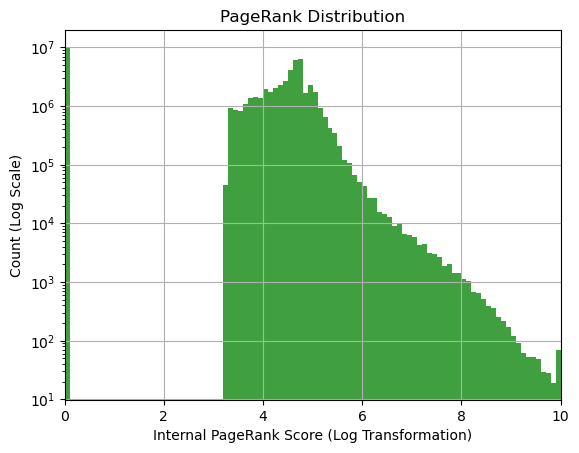

In [61]:
n, bins, patches = plt.hist(list(node_list['internal_R2']), 100, facecolor='g', alpha=0.75)
plt.xlabel('Internal PageRank Score (Log Transformation)')
plt.ylabel('Count (Log Scale)')
plt.title('PageRank Distribution')
plt.xlim(0, 10)
plt.yscale('log')
plt.grid(True)
plt.show()

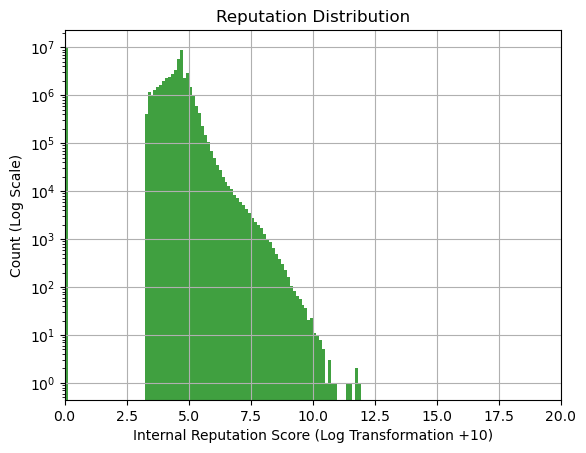

In [75]:
n, bins, patches = plt.hist(list(node_list['internal_R2_new']), 100, facecolor='g', alpha=0.75)
plt.xlabel('Internal Reputation Score (Log Transformation +10)')
plt.ylabel('Count (Log Scale)')
plt.title('Reputation Distribution')
plt.xlim(0, 20)
plt.yscale('log')
plt.grid(True)
plt.show()

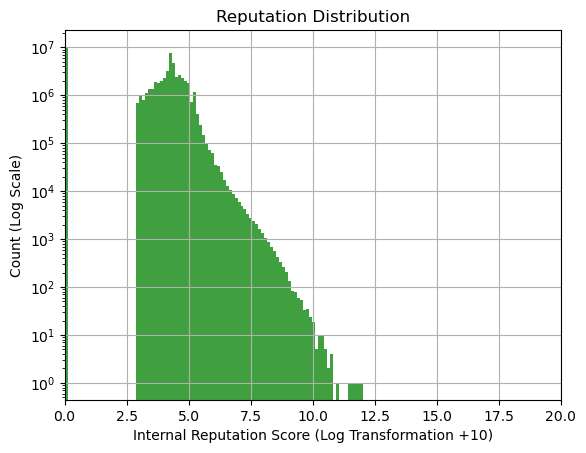

In [72]:
n, bins, patches = plt.hist(list(node_list['internal_R1']), 100, facecolor='g', alpha=0.75)
plt.xlabel('Internal Reputation Score (Log Transformation +10)')
plt.ylabel('Count (Log Scale)')
plt.title('Reputation Distribution')
plt.xlim(0, 20)
plt.yscale('log')
plt.grid(True)
plt.show()

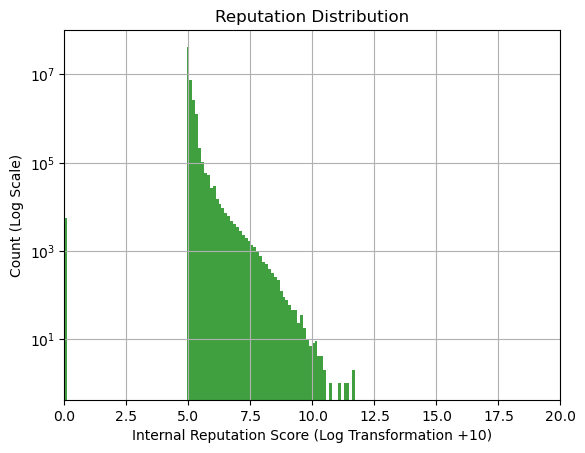

In [73]:
n, bins, patches = plt.hist(list(node_list['internal_R3']), 100, facecolor='g', alpha=0.75)
plt.xlabel('Internal Reputation Score (Log Transformation +10)')
plt.ylabel('Count (Log Scale)')
plt.title('Reputation Distribution')
plt.xlim(0, 20)
plt.yscale('log')
plt.grid(True)
plt.show()

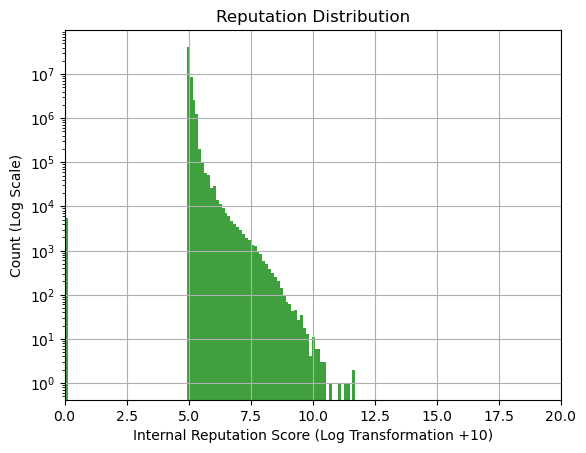

In [74]:
n, bins, patches = plt.hist(list(node_list['internal_R4']), 100, facecolor='g', alpha=0.75)
plt.xlabel('Internal Reputation Score (Log Transformation +10)')
plt.ylabel('Count (Log Scale)')
plt.title('Reputation Distribution')
plt.xlim(0, 20)
plt.yscale('log')
plt.grid(True)
plt.show()

In [76]:
node_list.head(5)

,Address,ID,Reputation_1,Reputation_2,Reputation_3,Reputation_4,Degree,In Degree,wpr_ranking_1,wpr_ranking_2,wpr_ranking_3,wpr_ranking_4,degree_ranking,in_degree_ranking,internal_R2,internal_ranking_R2,internal_R2_new,internal_R1,internal_R3,internal_R4
0,0x55d398326f99059ff775485246999027b3197955,237,104.258220,86.823495,53.078238,52.591825,12343824,12343824,0,0,0,0,0,0,10.0,0,11.9386,12.0181,11.7249,11.7209
1,0xae5f14a9aed2b56121fb964a84a9dff114296563,2309,2.122261,1.644983,1.120063,1.093934,371223,371223,28,27,27,29,46,27,10.0,1,10.2162,10.3268,10.0492,10.0390
2,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,1516,2.503413,1.634736,1.420138,1.508583,952047,224938,21,29,19,18,13,46,10.0,2,10.2134,10.3985,10.1523,10.1786
3,0x975d9bd9928f398c7e01f6ba236816fa558cd94b,2250,2.360132,1.619658,1.313460,1.313483,187017,142276,24,30,22,21,86,88,10.0,3,10.2094,10.3729,10.1184,10.1184
4,0x96eade4c5ca5251caa7801ed38fada4807f63cbe,29262,1.882949,1.569716,0.958094,0.955077,132530,132530,31,31,31,32,155,96,10.0,4,10.1958,10.2748,9.9814,9.9800


In [21]:
node_list['scale10_R1'] = node_list.apply(lambda row: np.clip(np.round(np.log10(row['Reputation_1']) +7, decimals=6), 0, 10) if (row['Reputation_1'] !=0) else 0 , axis=1)

In [22]:
node_list['scale10_R2'] = node_list.apply(lambda row: np.clip(np.round(np.log10(row['Reputation_2']) +7, decimals=6), 0, 10) if (row['Reputation_2'] !=0) else 0 , axis=1)

In [23]:
node_list['scale10_R3'] = node_list.apply(lambda row: np.clip(np.round(np.log10(row['Reputation_3']) +7, decimals=6), 0, 10) if (row['Reputation_3'] !=0) else 0 , axis=1)

In [24]:
node_list['scale10_R4'] = node_list.apply(lambda row: np.clip(np.round(np.log10(row['Reputation_4']) +7, decimals=6), 0, 10) if (row['Reputation_4'] !=0) else 0 , axis=1)

In [27]:
node_list.head(5)

,Address,ID,Reputation_1,Reputation_2,Reputation_3,Reputation_4,Degree,In Degree,scale10_R1,scale10_R2,scale10_R3,scale10_R4
0,0x7f74b66bb8a5ab09934ab3a8ac9c7a3a43acd5be,0,0.000000,0.000000,0.000010,0.000010,24,0,0.000000,0.000000,2.002982,2.002982
1,0x54b9b2f32bcb7cdffe21c2f91710d843f0f1400e,1,0.003761,0.005383,0.001196,0.001158,1843,1843,4.575303,4.731051,4.077841,4.063728
2,0x4668eaa732fc5547f96f8ea584acb0a29d7ef95a,2,0.000000,0.000000,0.000010,0.000010,22,0,0.000000,0.000000,2.002982,2.002982
3,0xebf7abc4316004cda6f5e61e631ef47d406116a1,3,0.000000,0.000000,0.000010,0.000010,20,0,0.000000,0.000000,2.002982,2.002982
4,0x7a36bbc328c88b62ada9ba351e8ddbf6bb83488d,4,0.000000,0.000000,0.000010,0.000010,17,0,0.000000,0.000000,2.002982,2.002982


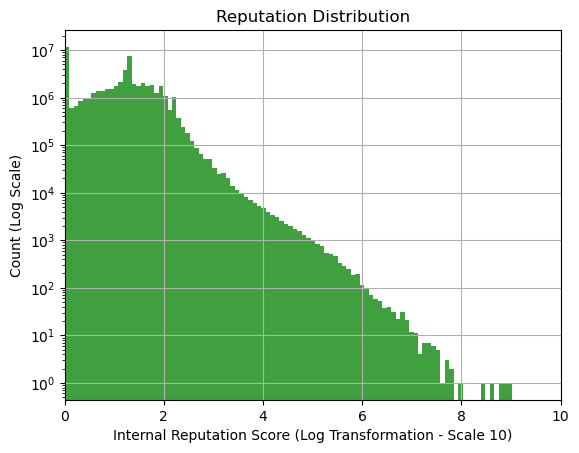

In [28]:
n, bins, patches = plt.hist(list(node_list['scale10_R1']), 100, facecolor='g', alpha=0.75)
plt.xlabel('Internal Reputation Score (Log Transformation - Scale 10)')
plt.ylabel('Count (Log Scale)')
plt.title('Reputation Distribution')
plt.xlim(0, 10)
plt.yscale('log')
plt.grid(True)
plt.show()

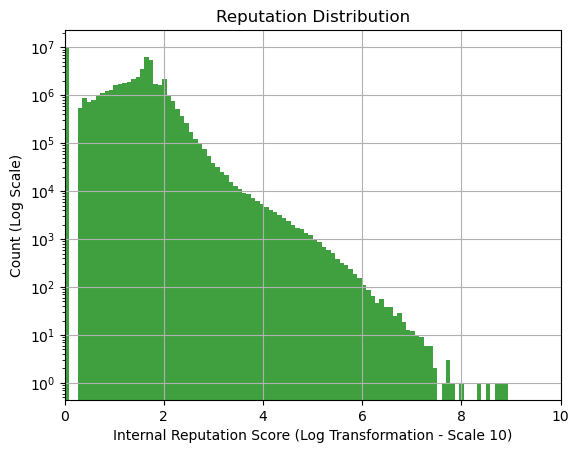

In [29]:
n, bins, patches = plt.hist(list(node_list['scale10_R2']), 100, facecolor='g', alpha=0.75)
plt.xlabel('Internal Reputation Score (Log Transformation - Scale 10)')
plt.ylabel('Count (Log Scale)')
plt.title('Reputation Distribution')
plt.xlim(0, 10)
plt.yscale('log')
plt.grid(True)
plt.show()

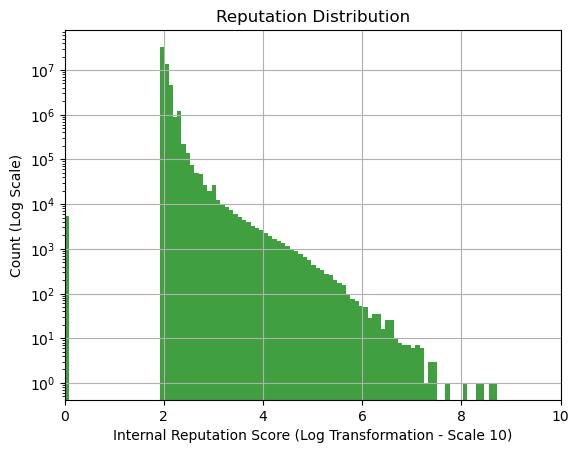

In [30]:
n, bins, patches = plt.hist(list(node_list['scale10_R3']), 100, facecolor='g', alpha=0.75)
plt.xlabel('Internal Reputation Score (Log Transformation - Scale 10)')
plt.ylabel('Count (Log Scale)')
plt.title('Reputation Distribution')
plt.xlim(0, 10)
plt.yscale('log')
plt.grid(True)
plt.show()

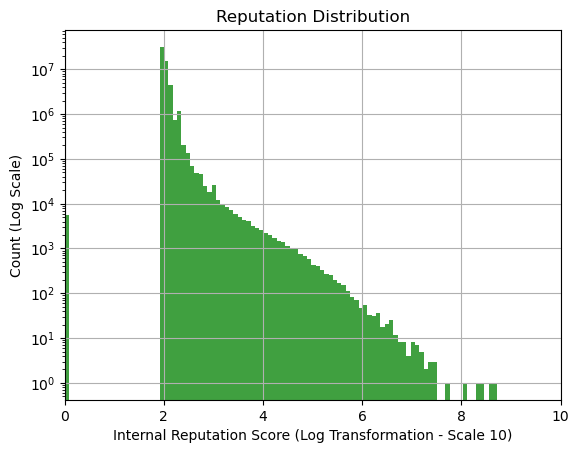

In [31]:
n, bins, patches = plt.hist(list(node_list['scale10_R4']), 100, facecolor='g', alpha=0.75)
plt.xlabel('Internal Reputation Score (Log Transformation - Scale 10)')
plt.ylabel('Count (Log Scale)')
plt.title('Reputation Distribution')
plt.xlim(0, 10)
plt.yscale('log')
plt.grid(True)
plt.show()

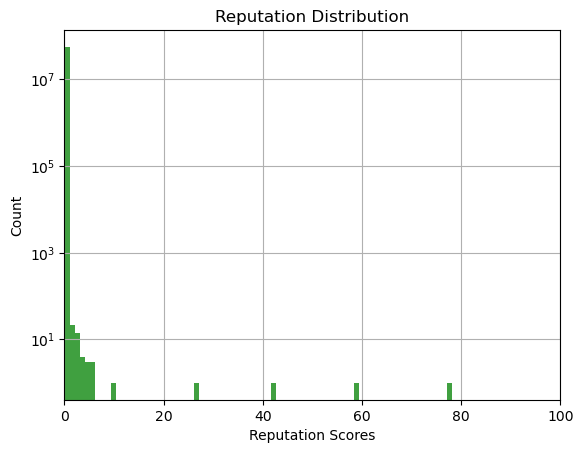

In [40]:
repu_list_1 = list(node_list['Reputation_1'])
n, bins, patches = plt.hist(repu_list_1, 100, facecolor='g', alpha=0.75)
plt.xlabel('Reputation Scores')
plt.ylabel('Count')
plt.title('Reputation Distribution')
plt.xlim(0, 100)
plt.yscale('log')
plt.grid(True)
plt.show()

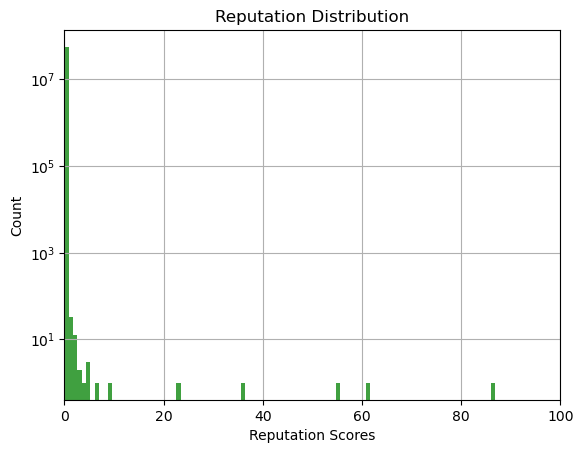

In [33]:
repu_list_2 = list(node_list['Reputation_2'])
n, bins, patches = plt.hist(repu_list_2, 100, facecolor='g', alpha=0.75)
plt.xlabel('Reputation Scores')
plt.ylabel('Count')
plt.title('Reputation Distribution')
plt.xlim(0, 100)
plt.yscale('log')
plt.grid(True)
plt.show()

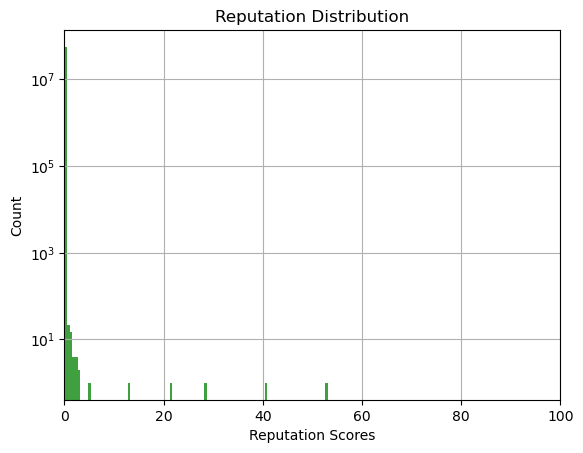

In [34]:
repu_list_3 = list(node_list['Reputation_3'])
n, bins, patches = plt.hist(repu_list_3, 100, facecolor='g', alpha=0.75)
plt.xlabel('Reputation Scores')
plt.ylabel('Count')
plt.title('Reputation Distribution')
plt.xlim(0, 100)
plt.yscale('log')
plt.grid(True)
plt.show()

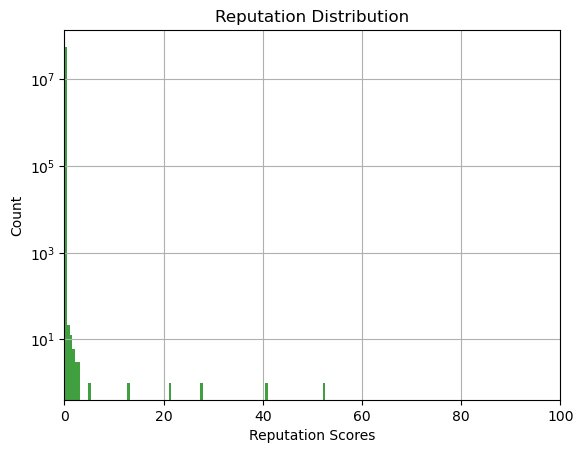

In [35]:
repu_list_4 = list(node_list['Reputation_4'])
n, bins, patches = plt.hist(repu_list_4, 100, facecolor='g', alpha=0.75)
plt.xlabel('Reputation Scores')
plt.ylabel('Count')
plt.title('Reputation Distribution')
plt.xlim(0, 100)
plt.yscale('log')
plt.grid(True)
plt.show()

In [57]:
node_list[1000000:].head(5)

,Address,ID,Reputation_1,Reputation_2,Reputation_3,Reputation_4,Degree,In Degree,scale10_R1,scale10_R2,scale10_R3,scale10_R4,internal_R2,internal_R1,internal_R3,internal_R4
7160896,0x388f723702808c21b2eef1985357c061d3de2da1,7160896,0.000030,0.000026,0.000025,0.000028,21,9,2.476829,2.415542,2.397701,2.446839,5.4155,5.4768,5.3977,5.4468
12626033,0xbec9ecb2a9cc88c9af69c7abd6537cd955f9fe96,12626033,0.000023,0.000026,0.000019,0.000019,11,4,2.355732,2.415541,2.285700,2.285699,5.4155,5.3557,5.2857,5.2857
18736251,0xb216761042b2068f16a70e2c59107a0691c99994,18736251,0.000013,0.000026,0.000012,0.000012,8,8,2.123857,2.415540,2.079171,2.077639,5.4155,5.1239,5.0792,5.0776
15055287,0x439f8f1e3d5bd86a7807a097216b793950d475d7,15055287,0.000014,0.000026,0.000013,0.000013,13,5,2.145295,2.415540,2.097733,2.098028,5.4155,5.1453,5.0977,5.0980
327349,0x2d93c7c11c59dd94815f089fed22b9efd5837e57,327349,0.000031,0.000026,0.000026,0.000026,42,13,2.486647,2.415540,2.406881,2.410698,5.4155,5.4866,5.4069,5.4107


In [66]:
degree_1M_mean=node_list[1000000:]['In Degree'].mean()
print(degree_1M_mean)

1.2372558635406896


In [41]:
mean_R1 = node_list['Reputation_1'].mean()
mean_R2 = node_list['Reputation_2'].mean()
mean_R3 = node_list['Reputation_3'].mean()
mean_R4 = node_list['Reputation_4'].mean()

In [42]:
print(mean_R1)
print(mean_R2)
print(mean_R3)
print(mean_R4)

1.8472831443662748e-05
1.8472831443676104e-05
1.8472831451382863e-05
1.847283145236417e-05


In [48]:
var_R1 = node_list['Reputation_1'].var()
var_R2 = node_list['Reputation_2'].var()
var_R3 = node_list['Reputation_3'].var()
var_R4 = node_list['Reputation_4'].var()

In [49]:
print(var_R1)
print(var_R2)
print(var_R3)
print(var_R4)

0.0004337593354320579
0.00030627423646490136
0.00011166249183612165
0.00011000847368981913


In [50]:
mean_iR1 = node_list['internal_R1'].mean()
mean_iR2 = node_list['internal_R2'].mean()
mean_iR3 = node_list['internal_R3'].mean()
mean_iR4 = node_list['internal_R4'].mean()
var_iR1 = node_list['internal_R1'].var()
var_iR2 = node_list['internal_R2'].var()
var_iR3 = node_list['internal_R3'].var()
var_iR4 = node_list['internal_R4'].var()

In [51]:
print(mean_iR1)
print(mean_iR2)
print(mean_iR3)
print(mean_iR4)
print(var_iR1)
print(var_iR2)
print(var_iR3)
print(var_iR4)

3.451018222218223
3.6349412930861935
5.0409435045771955
5.040830558394381
3.0388017557881164
3.275125223641335
0.013986912536567697
0.013678551787173771


In [53]:
degree_mean = node_list['Degree'].mean()
in_degree_mean = node_list['In Degree'].mean()
degree_var = node_list['Degree'].var()
in_degree_var = node_list['In Degree'].var()

In [54]:
print(degree_mean)
print(in_degree_mean)
print(degree_var)
print(in_degree_var)

9.250449051441349
4.625224525720674
7363602.195270491
7103564.327353906


In [55]:
node_list[:1000000].head(5)

,Address,ID,Reputation_1,Reputation_2,Reputation_3,Reputation_4,Degree,In Degree,scale10_R1,scale10_R2,scale10_R3,scale10_R4,internal_R2,internal_R1,internal_R3,internal_R4
237,0x55d398326f99059ff775485246999027b3197955,237,104.258220,86.823495,53.078238,52.591825,12343824,12343824,9.018110,8.938637,8.724917,8.720918,11.9386,12.0181,11.7249,11.7209
14556588,0xb9a5bde0a19288044784b859c903ee62ff2a3a65,14556588,77.799691,61.204497,40.768212,40.768244,4413541,4413541,8.890978,8.786783,8.610322,8.610322,11.7868,11.8910,11.6103,11.6103
10,0x10ed43c718714eb63d5aa57b78b54704e256024e,10,59.350524,55.161783,28.359346,27.726574,12237436,12237436,8.773425,8.741638,8.452696,8.442896,11.7416,11.7734,11.4527,11.4429
96,0xe9e7cea3dedca5984780bafc599bd69add087d56,96,42.713281,36.144456,21.559760,21.528719,6334594,6334594,8.630563,8.558042,8.333644,8.333018,11.5580,11.6306,11.3336,11.3330
25264249,0x2ab0e9e4ee70fff1fb9d67031e44f6410170d00e,25264249,26.332293,23.337141,12.950152,12.817184,2127698,2127698,8.420489,8.368048,8.112275,8.107793,11.3680,11.4205,11.1123,11.1078
